In [72]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_flow = pandas.read_csv('SUMMARY_FLOW.csv')
df_facility = pandas.read_csv('SUMMARY_FACILITY.csv')
df_sankey = pandas.read_csv('State_Sankey_www_flows.csv')

In [3]:
df_flow.head()

,CWNS_NUMBER,EXIST_MUNICIPAL,EXIST_INDUSTRIAL,EXIST_INFILTRATION,EXIST_TOTAL,EXIST_WET_WEATHER_PEAK,PRES_MUNICIPAL,PRES_INDUSTRIAL,PRES_INFILTRATION,PRES_TOTAL,PRES_WET_WEATHER_PEAK,PROJ_MUNICIPAL,PROJ_INDUSTRIAL,PROJ_INFILTRATION,PROJ_TOTAL,PROJ_WET_WEATHER_PEAK
0,1000002001,0.060,NaN,NaN,0.060,NaN,0.110,NaN,NaN,0.110,NaN,0.11,NaN,NaN,0.11,NaN
1,1000003001,2.500,0.3,0.2,3.000,NaN,7.600,NaN,NaN,7.600,NaN,7.60,NaN,NaN,7.60,NaN
2,1000004001,4.700,NaN,NaN,4.700,NaN,8.500,NaN,NaN,8.500,NaN,8.50,NaN,NaN,8.50,NaN
3,1000004002,1.510,NaN,NaN,1.510,NaN,1.950,NaN,NaN,1.950,NaN,1.95,NaN,NaN,1.95,NaN
4,1000005001,0.017,NaN,NaN,0.017,0.287,0.016,NaN,NaN,0.016,NaN,0.07,NaN,NaN,0.07,NaN


In [4]:
df_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15359 entries, 0 to 15358
Data columns (total 16 columns):
CWNS_NUMBER               15359 non-null int64
EXIST_MUNICIPAL           13534 non-null float64
EXIST_INDUSTRIAL          2157 non-null float64
EXIST_INFILTRATION        941 non-null float64
EXIST_TOTAL               14613 non-null float64
EXIST_WET_WEATHER_PEAK    1063 non-null float64
PRES_MUNICIPAL            13536 non-null float64
PRES_INDUSTRIAL           2191 non-null float64
PRES_INFILTRATION         598 non-null float64
PRES_TOTAL                14613 non-null float64
PRES_WET_WEATHER_PEAK     680 non-null float64
PROJ_MUNICIPAL            14017 non-null float64
PROJ_INDUSTRIAL           2311 non-null float64
PROJ_INFILTRATION         621 non-null float64
PROJ_TOTAL                15151 non-null float64
PROJ_WET_WEATHER_PEAK     751 non-null float64
dtypes: float64(15), int64(1)
memory usage: 1.9 MB


In [5]:
df_facility.head()

,REGION,STATE,PRIMARY_COUNTY,SECONDARY_COUNTIES,AUTHORITY,POINT_OF_CONTACT_NAME,POINT_OF_CONTACT_STREET_1,POINT_OF_CONTACT_STREET_2,POINT_OF_CONTACT_CITY,POINT_OF_CONTACT_STATE,...,MEASUREMENT_DATE,TRIBE_IND,SPECIAL_PROGRAM_AREAS,FACILITY_ID,REVIEW_STATUS,SMALL_COMMUNITY_IND,POTW_PRESENT_IND,POTW_PROJECTED_IND,DECENTRALIZED_ONLY_IND,CITIES_TOWNS
0,4,AL,Hale,NaN,Town of Akron,Stanley Hollie,P. O. Box 8,NaN,Akron,AL,...,NaN,N,NaN,1239395,Federal Accepted,Y,Y,Y,N,NaN
1,4,AL,Shelby,NaN,City of Alabaster,Glen McCord,201 1st Street North,NaN,ALABASTER,AL,...,NaN,N,NaN,1101826,Federal Accepted,N,Y,Y,N,"Alabaster, Unincorporated areas"
2,4,AL,Tallapoosa,NaN,ALEXANDER CITY SUGAR CK WWTP,Shelby Richardson,CITY OF ALEXANDER,2515 SUGAR CREEK ROAD,ALEXANDER CITY,AL,...,NaN,N,NaN,1101827,Federal Accepted,N,Y,Y,N,NaN
3,4,AL,Tallapoosa,NaN,Alexander City Wastewater Treatment,Shelby Richardson,P.O. Box 552,NaN,Alexander City,AL,...,NaN,N,NaN,1101828,Federal Accepted,N,Y,Y,N,NaN
4,4,AL,Etowah,NaN,Altoona Water & Sewer Board,Nate Livingston,P.O. Box 279,2844 Main Street,Altoona,AL,...,NaN,N,NaN,1101831,Federal Accepted,Y,Y,Y,N,"Altoona, Unincorporated areas"


In [6]:
df_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27016 entries, 0 to 27015
Data columns (total 59 columns):
REGION                            27016 non-null int64
STATE                             27016 non-null object
PRIMARY_COUNTY                    27016 non-null object
SECONDARY_COUNTIES                481 non-null object
AUTHORITY                         27016 non-null object
POINT_OF_CONTACT_NAME             10214 non-null object
POINT_OF_CONTACT_STREET_1         11639 non-null object
POINT_OF_CONTACT_STREET_2         2934 non-null object
POINT_OF_CONTACT_CITY             11965 non-null object
POINT_OF_CONTACT_STATE            27016 non-null object
POINT_OF_CONTACT_ZIP              11662 non-null object
POINT_OF_CONTACT_PHONE            11528 non-null object
POINT_OF_CONTACT_FAX              4699 non-null object
POINT_OF_CONTACT_EMAIL            4546 non-null object
FACILITY_NAME                     27016 non-null object
CWNS_NUMBER                       27016 non-null int64
OW

In [7]:
df_merge = pandas.merge(df_flow, df_facility, how= 'inner', on= 'CWNS_NUMBER')

In [8]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15359 entries, 0 to 15358
Data columns (total 74 columns):
CWNS_NUMBER                       15359 non-null int64
EXIST_MUNICIPAL                   13534 non-null float64
EXIST_INDUSTRIAL                  2157 non-null float64
EXIST_INFILTRATION                941 non-null float64
EXIST_TOTAL                       14613 non-null float64
EXIST_WET_WEATHER_PEAK            1063 non-null float64
PRES_MUNICIPAL                    13536 non-null float64
PRES_INDUSTRIAL                   2191 non-null float64
PRES_INFILTRATION                 598 non-null float64
PRES_TOTAL                        14613 non-null float64
PRES_WET_WEATHER_PEAK             680 non-null float64
PROJ_MUNICIPAL                    14017 non-null float64
PROJ_INDUSTRIAL                   2311 non-null float64
PROJ_INFILTRATION                 621 non-null float64
PROJ_TOTAL                        15151 non-null float64
PROJ_WET_WEATHER_PEAK             751 non-null flo

In [9]:
df_merge.head()

,CWNS_NUMBER,EXIST_MUNICIPAL,EXIST_INDUSTRIAL,EXIST_INFILTRATION,EXIST_TOTAL,EXIST_WET_WEATHER_PEAK,PRES_MUNICIPAL,PRES_INDUSTRIAL,PRES_INFILTRATION,PRES_TOTAL,...,MEASUREMENT_DATE,TRIBE_IND,SPECIAL_PROGRAM_AREAS,FACILITY_ID,REVIEW_STATUS,SMALL_COMMUNITY_IND,POTW_PRESENT_IND,POTW_PROJECTED_IND,DECENTRALIZED_ONLY_IND,CITIES_TOWNS
0,1000002001,0.060,NaN,NaN,0.060,NaN,0.110,NaN,NaN,0.110,...,NaN,N,NaN,1239395,Federal Accepted,Y,Y,Y,N,NaN
1,1000003001,2.500,0.3,0.2,3.000,NaN,7.600,NaN,NaN,7.600,...,NaN,N,NaN,1101826,Federal Accepted,N,Y,Y,N,"Alabaster, Unincorporated areas"
2,1000004001,4.700,NaN,NaN,4.700,NaN,8.500,NaN,NaN,8.500,...,NaN,N,NaN,1101827,Federal Accepted,N,Y,Y,N,NaN
3,1000004002,1.510,NaN,NaN,1.510,NaN,1.950,NaN,NaN,1.950,...,NaN,N,NaN,1101828,Federal Accepted,N,Y,Y,N,NaN
4,1000005001,0.017,NaN,NaN,0.017,0.287,0.016,NaN,NaN,0.016,...,NaN,N,NaN,1101831,Federal Accepted,Y,Y,Y,N,"Altoona, Unincorporated areas"


In [33]:
df_data = df_merge.groupby('FACILITY_STATE').agg({'EXIST_TOTAL': np.sum,
                                               'EXIST_INDUSTRIAL': np.sum,
                                               'EXIST_MUNICIPAL': np.sum,
                                               'EXIST_INFILTRATION': np.sum})

In [34]:
df_data.dtypes

EXIST_TOTAL           float64
EXIST_INDUSTRIAL      float64
EXIST_INFILTRATION    float64
EXIST_MUNICIPAL       float64
dtype: object

In [27]:
#don't need this. just use reset_index below
#df_data['index'] = df_data.index

In [44]:
df_final_flow = df_data.reset_index()

In [45]:
df_final_flow

,FACILITY_STATE,EXIST_TOTAL,EXIST_INDUSTRIAL,EXIST_INFILTRATION,EXIST_MUNICIPAL
0,AK,37.886,NaN,NaN,NaN
1,AL,412.251,19.205,17.520,374.566
2,AR,265.932,NaN,NaN,265.911
3,AS,3.110,NaN,1.100,2.010
4,AZ,498.772,3.034,1.420,275.259
5,CA,3515.950,211.924,5.090,3004.506
6,CO,372.378,2.380,NaN,68.377
7,CT,388.009,64.544,44.476,278.989
8,DC,370.002,NaN,NaN,370.002
9,DE,104.110,15.450,NaN,86.650


In [39]:
df_sankey.dtypes

FACILITY_STATE     object
waste_water       float64
dtype: object

In [56]:
df_final = pandas.merge(df_final_flow, df_sankey, how= 'inner', on = 'FACILITY_STATE')

In [57]:
df_final

,FACILITY_STATE,EXIST_TOTAL,EXIST_INDUSTRIAL,EXIST_INFILTRATION,EXIST_MUNICIPAL,waste_water
0,AK,37.886,NaN,NaN,NaN,69.744888
1,AL,412.251,19.205,17.520,374.566,686.321488
2,AR,265.932,NaN,NaN,265.911,292.393753
3,AZ,498.772,3.034,1.420,275.259,563.568726
4,CA,3515.950,211.924,5.090,3004.506,4716.181913
5,CO,372.378,2.380,NaN,68.377,634.182624
6,CT,388.009,64.544,44.476,278.989,369.795368
7,DE,104.110,15.450,NaN,86.650,69.788494
8,FL,1560.995,24.410,NaN,720.554,1809.395071
9,GA,767.345,88.979,NaN,583.986,933.831256


In [58]:
plt.scatter(df_final['EXIST_TOTAL'], df_final['waste_water'])

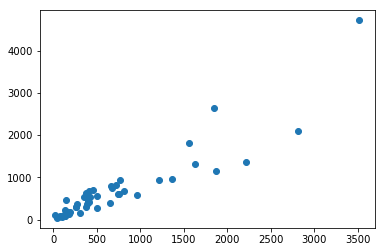

In [59]:
plt.show()

In [60]:
df_final['Difference'] = df_final['EXIST_TOTAL'] - df_final['waste_water']

In [61]:
# (obs2 - obs1) / obs1
df_final['% change'] = (df_final['Difference']/ df_final['waste_water']) * 100

In [62]:
df_final

,FACILITY_STATE,EXIST_TOTAL,EXIST_INDUSTRIAL,EXIST_INFILTRATION,EXIST_MUNICIPAL,waste_water,Difference,% change
0,AK,37.886,NaN,NaN,NaN,69.744888,-31.858888,-45.679173
1,AL,412.251,19.205,17.520,374.566,686.321488,-274.070489,-39.933252
2,AR,265.932,NaN,NaN,265.911,292.393753,-26.461753,-9.050040
3,AZ,498.772,3.034,1.420,275.259,563.568726,-64.796726,-11.497573
4,CA,3515.950,211.924,5.090,3004.506,4716.181913,-1200.231913,-25.449229
5,CO,372.378,2.380,NaN,68.377,634.182624,-261.804624,-41.282213
6,CT,388.009,64.544,44.476,278.989,369.795368,18.213631,4.925327
7,DE,104.110,15.450,NaN,86.650,69.788494,34.321506,49.179319
8,FL,1560.995,24.410,NaN,720.554,1809.395071,-248.400071,-13.728349
9,GA,767.345,88.979,NaN,583.986,933.831256,-166.486256,-17.828302


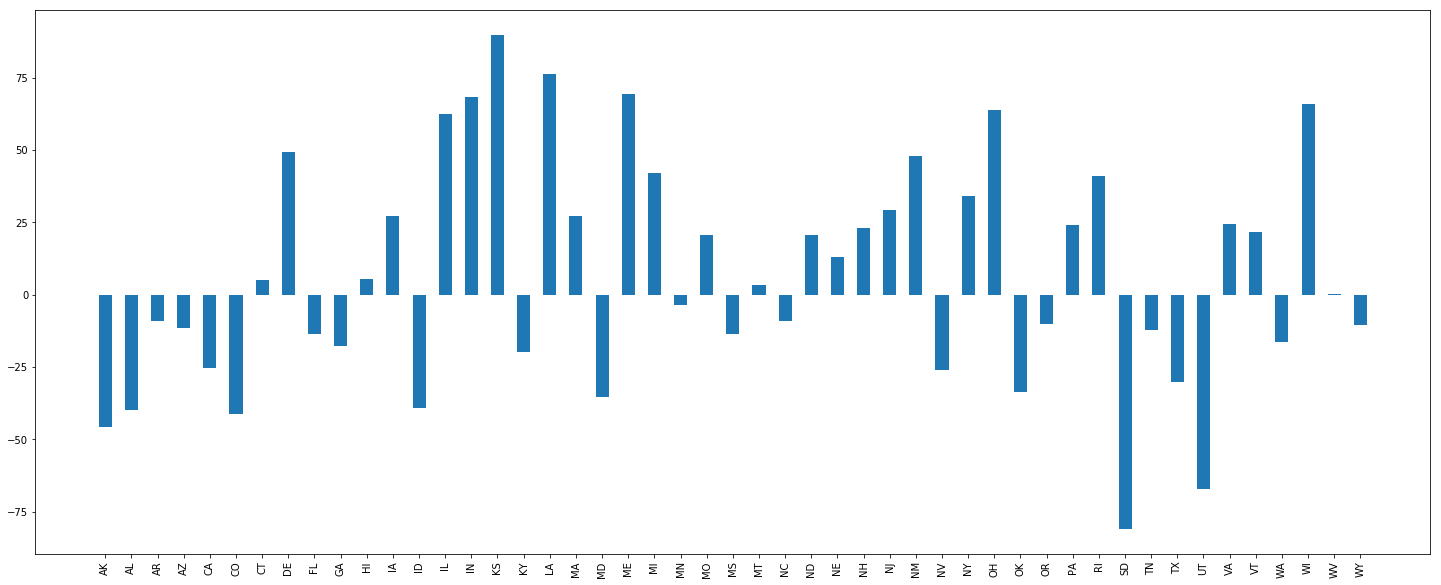

In [104]:
titles = df_final['FACILITY_STATE']
bar_heights = df_final['% change']
bar_positions = np.arange(len(bar_heights))

plt.figure(figsize = (25,10))
plt.bar(bar_positions, bar_heights, .5)
plt.xticks(bar_positions, titles, rotation = 90)
plt.show()
plt.savefig('test.jpg')

In [107]:
df_final.to_csv('waste_water_test', sep = ',')